
<div dir=ltr align=center>

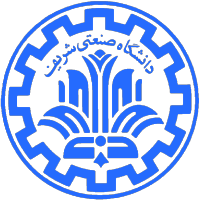

<font color=0F5298 size=7>
Machine Learning <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
Fall 2025 <br>
<font color=3C99D size=5>
    Supervised Learning: Polynomial Regression and Perceptron<br>
<font color=696880 size=4>
Prepared by Aysan Rahimi and Fatemeh Khojasteh

____

# Student Information

In [ ]:
student_number = '402105998'
full_name = 'Faraz Doagooye Tehrani'

___
# *Part 1: Polynomial Regression*
___

### 1. Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import joblib


### 2. Simulate the Dataset

In this section, we aim to predict the fuel consumption of a company's
aircraft across different flight routes in order to optimize operational costs. Preliminary studies have shown that fuel consumption depends on several factors such as average flight speed, flight altitude, and payload weight.
To simplify the analysis, in this exercise we will only consider the effect
of average flight speed on fuel consumption.

The relationship between speed and fuel consumption is modeled as follows:

$$
FuelConsumption = -0.05v^4 + 2v^3 - 3v^2 + v + 120 + \varepsilon, \quad \varepsilon \sim \mathcal{N}(0, 50^2)
$$

**Instructions:**  
- Simulate synthetic data following the above model.  
- Choose flight speeds `v` between 2 and 14 (hundreds of km/h).  
- Add Gaussian noise and plot the data as a scatter plot.


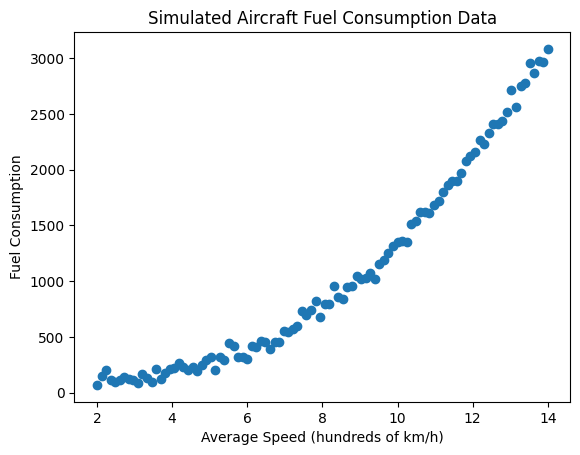

In [2]:
np.random.seed(111)

v = np.linspace(2, 14, 100)
noise = np.random.normal(0, 50, size=v.shape)
y = -0.05 * v**4 + 2 * v**3 - 3 * v**2 + v + 120 + noise

plt.scatter(v, y)
plt.xlabel("Average Speed (hundreds of km/h)")
plt.ylabel("Fuel Consumption")
plt.title("Simulated Aircraft Fuel Consumption Data")
plt.show()


### 3. Split the Data (Training / Testing)

Split the dataset into training and testing subsets.  
Remember to reshape the input arrays into 2D (`(n_samples, 1)` format).

In [4]:
v_train, v_test, y_train, y_test = train_test_split(
    v, y, test_size=0.2, random_state=42
)

v_train = v_train.reshape(-1, 1)
v_test = v_test.reshape(-1, 1)

print("Train size:", v_train.shape[0], "Test size:", v_test.shape[0])


Train size: 80 Test size: 20



### 4. Train and Compare Polynomial Regression Models

Train and compare models of degrees `[1, 2, 3, 5, 20, 30]`.

1. Use `PolynomialFeatures` to create polynomial input features.  
2. Train a `LinearRegression` model for each degree.  
3. Compute the **Mean Squared Error (MSE)** on both train and test sets.  
4. Store the results and print them.


In [38]:
degrees = [1, 2, 3, 5, 20, 30]
train_mse, test_mse = [], []

for d in degrees:
    poly = PolynomialFeatures(degree=d)

    X_train_poly = poly.fit_transform(v_train)
    X_test_poly = poly.transform(v_test)

    model = LinearRegression()

    model.fit(X_train_poly, y_train)


    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    train_mse.append(mse_train)
    test_mse.append(mse_test)

    print(f"Degree {d}: Train MSE = {mse_train:.2f}, Test MSE = {mse_test:.2f}")


Degree 1: Train MSE = 74298.95, Test MSE = 53862.15
Degree 2: Train MSE = 2467.90, Test MSE = 2697.43
Degree 3: Train MSE = 2385.09, Test MSE = 2409.33
Degree 5: Train MSE = 2269.27, Test MSE = 2575.42
Degree 20: Train MSE = 4270.02, Test MSE = 5592.96
Degree 30: Train MSE = 47365.29, Test MSE = 47670.68



### 5. Plot the Model Fits

For each model, plot the fitted polynomial curve together with the training data.  
Use a smooth grid.


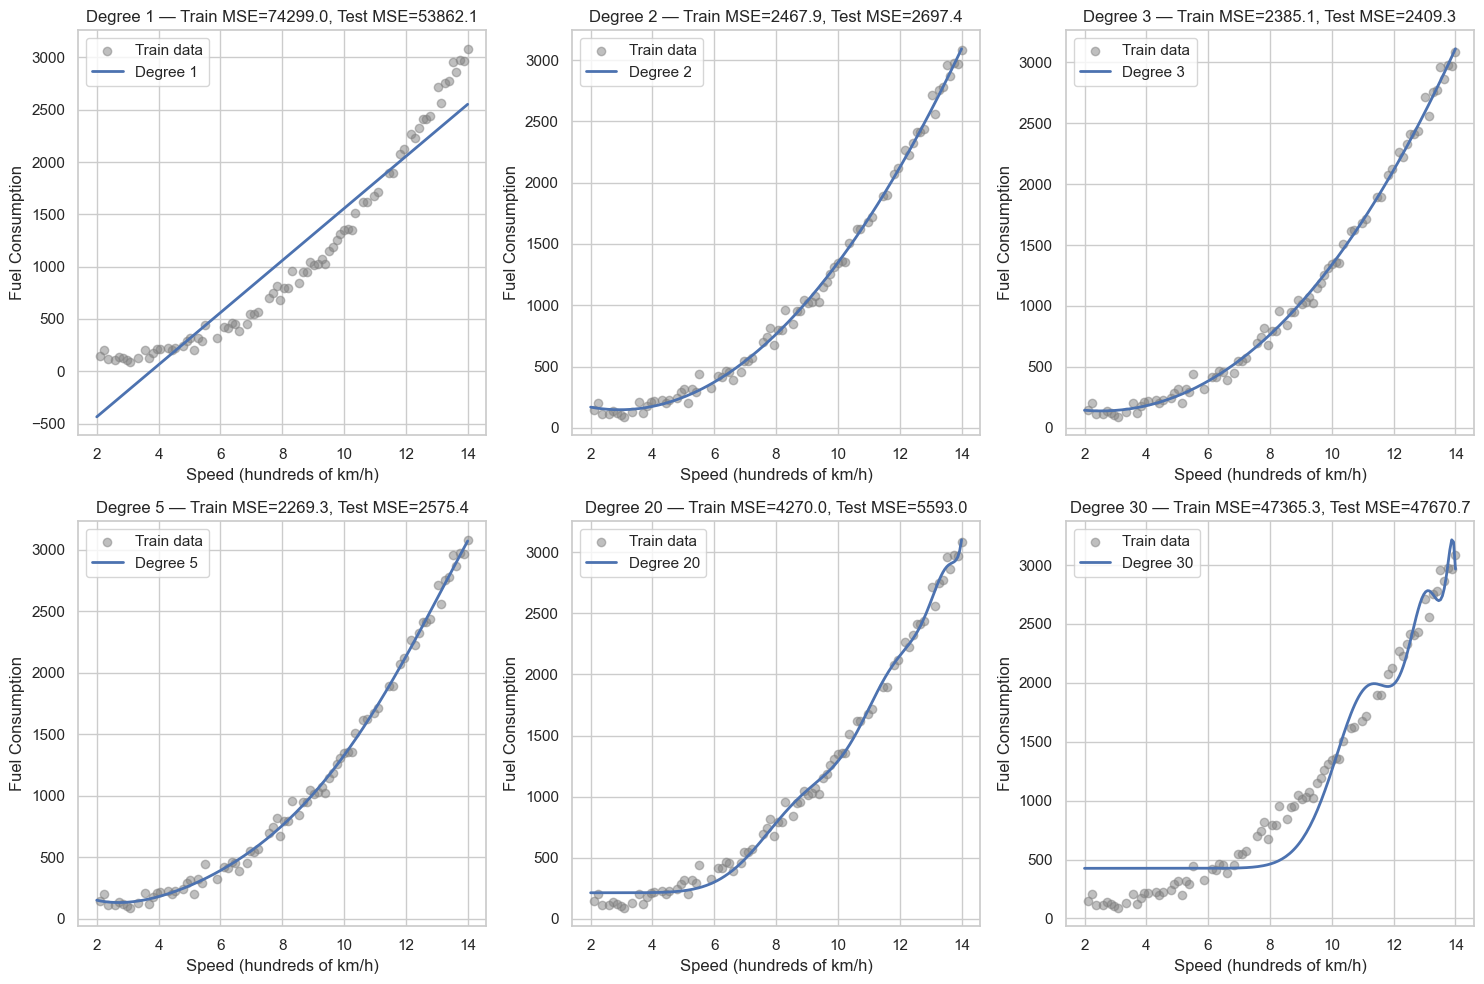

In [39]:

plt.figure(figsize=(15,10))

for i, d in enumerate(degrees, 1):
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(v_train)
    X_test_poly = poly.transform(v_test)   
    model = LinearRegression() 
    
    model.fit(X_train_poly, y_train)

    v_grid = np.linspace(2, 14, 200).reshape(-1, 1)

    X_grid_poly = poly.transform(v_grid)
    y_grid = model.predict(X_grid_poly)

    plt.subplot(2, 3, i)
    plt.scatter(v_train, y_train, color='gray', alpha=0.5, label='Train data')
    plt.plot(v_grid, y_grid, label=f'Degree {d}', linewidth=2)
    plt.title(f'Degree {d} — Train MSE={train_mse[i-1]:.1f}, Test MSE={test_mse[i-1]:.1f}')
    plt.xlabel('Speed (hundreds of km/h)')
    plt.ylabel('Fuel Consumption')
    plt.legend()

plt.tight_layout()
plt.show()



### 6. Plot MSE vs Polynomial Degree

Plot how training and testing MSE change as the polynomial degree increases.  
Discuss what trend you observe.

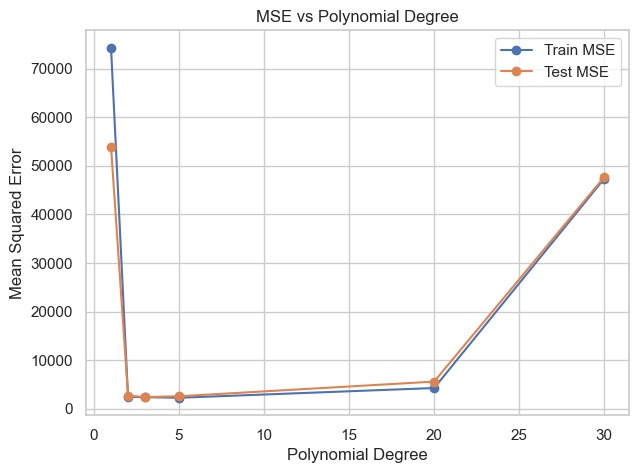

In [40]:

plt.figure(figsize=(7,5))
plt.plot(degrees, train_mse, 'o-', label='Train MSE')
plt.plot(degrees, test_mse, 'o-', label='Test MSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs Polynomial Degree')
plt.legend()
plt.grid(True)
plt.show()



### 7. Analysis — Written Answers

Answer the following questions briefly:

1. Which models **underfit** the data and why?  
2. Which models **overfit** the data and why?  

**>>WRITE YOUR ANSWER HERE**

. 1: As we see with the first degree polynomial, both the test and the training mses are very high and the model acts poorly in both cases and the model needs to be more complex to capture the shape of the data.

.2: As we can see from the plot above and the one before it, as we increase the degree from 5 going forward, the model seems to be acting worse one the test data in comparison to the training one and it seems to have gotten too complex.






### 8. Save Final Model and Predict for New Speeds

- Retrain the model with the chosen optimal degree.  
- Save the model using `joblib.dump`.  
- Predict for new speeds `[6, 9, 12]` (hundreds of km/h).  
- Ensure predictions are logically consistent (should increase with higher speeds).


In [11]:

best_degree = 4 #3 and 5 were the best so i took the mean
poly_final = PolynomialFeatures(degree=4)
X_train_final = poly_final.fit_transform(v_train)
model_final = LinearRegression()

model_final.fit(X_train_final, y_train)

# Save the model
joblib.dump((poly_final, model_final), 'skyfuel_final_model.pkl')

# Predict new speeds
new_speeds = np.array([[6], [9], [12]])
preds = model_final.predict(poly_final.transform(new_speeds))
for s, p in zip(new_speeds.flatten(), preds):
    print(f"Predicted fuel consumption for speed {int(s*100)} km/h: {p:.2f}")


Predicted fuel consumption for speed 600 km/h: 383.82
Predicted fuel consumption for speed 900 km/h: 1021.09
Predicted fuel consumption for speed 1200 km/h: 2125.42


___
# *Part 2: Perceptron*
___

## Goal

In this section, we will implement the Perceptron algorithm for a binary classification problem **from scratch**. We will do this without using pre-built libraries like scikit-learn (for the model itself) to understand its inner workings.

### Step 1: Import Libraries

First, let's import the necessary libraries for numerical computation (Numpy), visualization (Matplotlib/Seaborn), and for loading our dataset (Scikit-learn).

In [21]:
from sklearn.datasets import load_iris
import seaborn as sns

# Set a nice style for the plots
sns.set(style="whitegrid")

The Iris dataset is a classic dataset in machine learning and statistics.

It contains 150 measurements of three iris flower species (Iris-setosa, Iris-versicolor, Iris-virginica).

For each flower, it records four features: sepal length, sepal width, petal length, and petal width (all in cm).

The goal is typically to predict the species of an iris flower based on these four measurements.

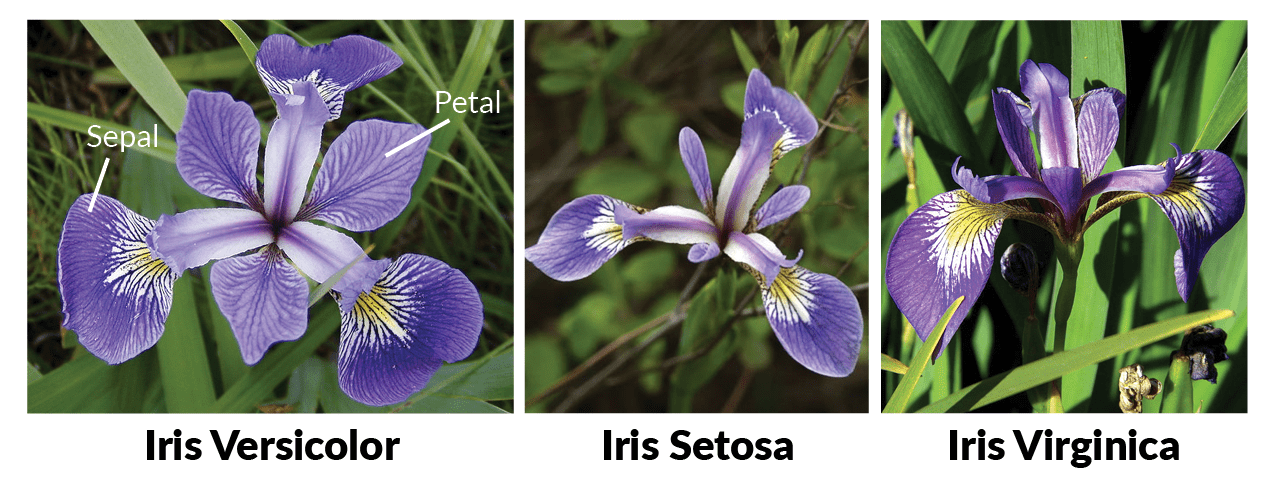

### Step 2: Load and Prepare the Data

To keep the exercise simple, we will simplify the dataset:

  * **Only Two Classes:** We will only work with the first two classes (Setosa and Versicolor), which are known to be linearly separable.
  * **Only Two Features:** We will only select two features ('Sepal Length' and 'Petal Length') so we can easily plot the data on a 2D chart.


In [22]:
# Load the dataset
iris = load_iris()

# Select the first 100 samples (classes 0 and 1)
# and only 2 features (feature 0: Sepal Length, feature 2: Petal Length)
X = iris.data[:100, [0, 2]]
y = iris.target[:100]

# The Perceptron algorithm traditionally works with labels {1, -1}.
y = np.where(y == 0, -1, 1)

print("Shape of input data (X):", X.shape)
print("Shape of target data (y):", y.shape)
print("Unique labels:", np.unique(y))

Shape of input data (X): (100, 2)
Shape of target data (y): (100,)
Unique labels: [-1  1]


### Step 3: Visualize the Data

Before building the model, it's always a good idea to visualize the data. This helps us understand why the Perceptron *should* work well on this dataset.


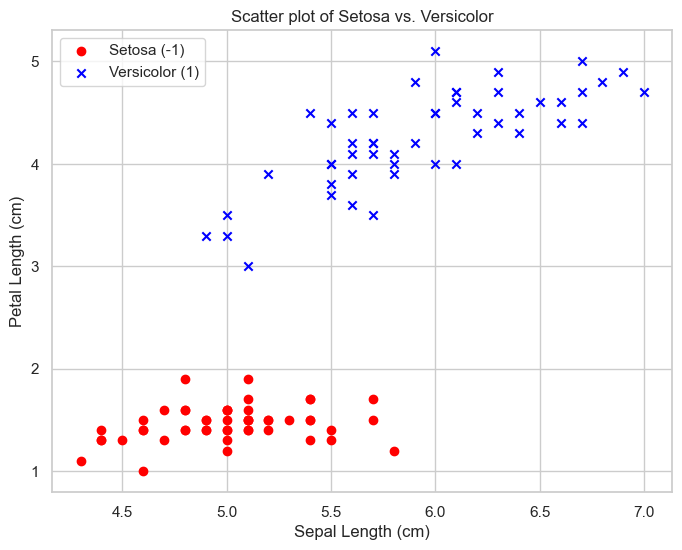

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(X[y == -1, 0], X[y == -1, 1], color='red', marker='o', label='Setosa (-1)')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='x', label='Versicolor (1)')

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.legend(loc='upper left')
plt.title('Scatter plot of Setosa vs. Versicolor')
plt.show()

**Analysis:** As you can see in the plot, these two classes are clearly separable by a single straight line. This dataset is **linearly separable**, which guarantees that the Perceptron algorithm will converge to a solution.

### Step 4: Implement the Perceptron Class

This is the core part of the exercise. We will write a Python class that implements the Perceptron logic.

**The Perceptron Logic:**

1.  **Net Input:** $z = w \cdot x + b$ (The dot product of weights and inputs, plus the bias).
2.  **Activation Function:** A simple step function. If $z \ge 0$, output $1$, otherwise output $-1$.
3.  **Update Rule:** The weights are only updated if the prediction is wrong.
      * $w_{new} = w_{old} + \eta \cdot (y_i - \hat{y}_i) \cdot x_i$
      * $b_{new} = b_{old} + \eta \cdot (y_i - \hat{y}_i)$
        Where $\eta$ (eta) is the learning rate.

<!-- end list -->

In [30]:
class Perceptron:
    """
    Perceptron classifier implementation from scratch.

    Parameters
    ----------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_epochs : int
      Number of passes (epochs) over the training dataset.

    Attributes
    ----------
    w_ : 1d-array
      Weights learned after fitting. The bias is included as the first element (w_[0]).
    errors_ : list
      Number of misclassifications (errors) in each epoch.

    """
    def __init__(self, eta=0.1, n_epochs=50):
        self.eta = eta
        self.n_epochs = n_epochs

    def fit(self, X, y):
        """
        Fit the model to the training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors.
        y : array-like, shape = [n_samples]
          Target labels (-1 and 1).
        """

        # Initialize weights
        # We include the bias (b) as the first element (w_[0])
        # +1 for the bias
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_epochs):
            epoch_errors = 0
            # Loop over all training samples
            for xi, target in zip(X, y):

                prediction = self.predict(xi)
                update = target - prediction

                self.w_[1:] += self.eta * update * xi
                self.w_[0] += self.eta * update

                # Count errors
                if update != 0.0:
                    epoch_errors += 1

            self.errors_.append(epoch_errors)

            # Early stopping if the model has converged
            if epoch_errors == 0:
                print(f"Converged after {_ + 1} epochs.")
                break

        return self

    def net_input(self, X):
        """Calculate the net input (z = w.x + b)"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Predict the class label (the step function)"""
        # If net_input >= 0.0, output 1, otherwise -1
        return np.where(self.net_input(X) >= 0.0, 1, -1)

### Step 5: Train the Model and Plot the Learning Curve

Now, let's create an instance of our `Perceptron` class and train it on the Iris data. We will also plot the number of errors per epoch to see if it converges.


Converged after 6 epochs.


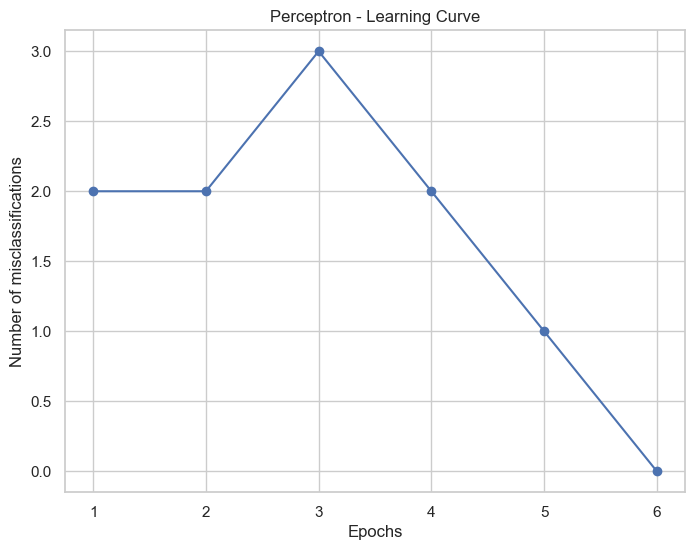

In [31]:
# Create the model
ppn = Perceptron(eta=0.1, n_epochs=10)

# Train the model
ppn.fit(X, y)

# Plot the errors (misclassifications) per epoch
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.title('Perceptron - Learning Curve')
plt.show()

**Analysis:** The plot above should show that the number of errors rapidly decreases and reaches zero (in this case, after just a few epochs). This proves that our algorithm was implemented correctly and the model has **converged**.


### Step 6: Plot the Decision Boundary

Finally, let's visualize the line that our Perceptron has learned. We will plot this "decision boundary" on top of our original data to see how it separates the classes.


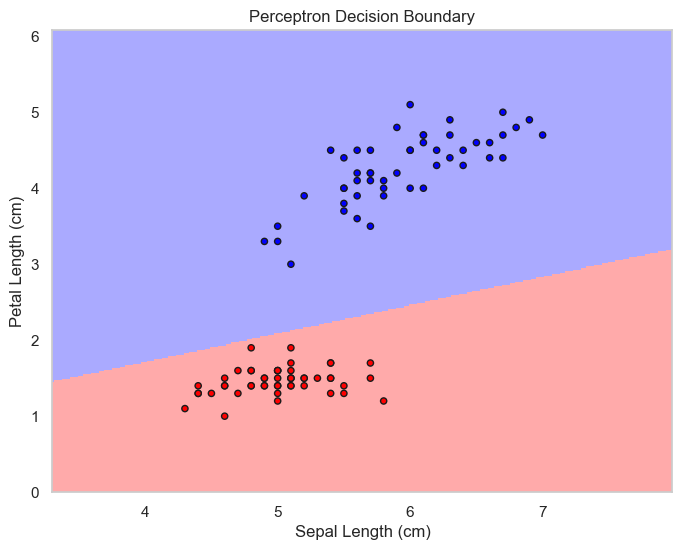

In [32]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(X, y, classifier):
    # Copy X and y to avoid modification
    X_plot, y_plot = X.copy(), y.copy()

    # Define colors
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF']) # Background colors
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])  # Point colors

    # Create a mesh grid of points
    x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
    y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1

    # h = step size
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Predict on all points in the mesh grid
    Z = classifier.predict(np.array([xx.ravel(), yy.ravel()]).T)
    Z = Z.reshape(xx.shape)

    # Plot the background
    plt.figure(figsize=(8, 6))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

    # Plot the data points
    plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y_plot, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('Sepal Length (cm)')
    plt.ylabel('Petal Length (cm)')
    plt.title('Perceptron Decision Boundary')

# Call the function to plot
plot_decision_boundary(X, y, ppn)
plt.show()

The line you see in the plot above is the decision boundary that our Perceptron learned. As you can see, this line has perfectly separated the two classes, Setosa and Versicolor.